## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Stock Market History Data - data cleansing 

In [22]:
#import yfinance as yf
import pandas as pd

In [23]:
df_stocks=pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
#df_stocks.drop(index=1, inplace=True)
df_stocks.head(3)

Date Stock       Open        Low      Close  Adjusted_Close  \
0  2010-01-04  AAPL   7.660714   7.585000   7.643214        6.479000   
1  2010-01-04  AMZN   6.830500   6.657000   6.695000        6.695000   
2  2010-01-04  GOOG  15.678981  15.547723  15.610239       15.610239   

        Volume  Month  Price_Change_Pct  Adjusted_Close_Change  
0  493729600.0      1               NaN                    NaN  
1  151998000.0      1               NaN                    NaN  
2   78541293.0      1               NaN                    NaN

In [24]:
df_stocks = df_stocks[df_stocks['Stock'] == 'MSFT']

In [25]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522 entries, 3 to 17486
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   3522 non-null   object 
 1   Stock                  3522 non-null   object 
 2   Open                   3522 non-null   float64
 3   Low                    3522 non-null   float64
 4   Close                  3522 non-null   float64
 5   Adjusted_Close         3522 non-null   float64
 6   Volume                 3522 non-null   float64
 7   Month                  3522 non-null   int64  
 8   Price_Change_Pct       3521 non-null   float64
 9   Adjusted_Close_Change  3521 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 302.7+ KB


### Stock Market History Data - EDA 

In [26]:
df_stocks.describe()

Open          Low        Close  Adjusted_Close        Volume  \
count  3522.000000  3522.000000  3522.000000     3522.000000  3.522000e+03   
mean    116.392172   114.081403   115.293921      109.983077  3.727788e+07   
std     102.855631   100.714645   101.837071      102.656432  2.105607e+07   
min      23.320000    22.730000    23.010000       17.613329  7.425600e+06   
25%      33.335001    32.660001    33.022500       27.421297  2.352038e+07   
50%      63.100000    62.289999    62.660000       57.211771  3.141700e+07   
75%     203.549995   197.272495   201.122501      194.997337  4.576332e+07   
max     384.299988   378.160004   382.700012      382.700012  3.193179e+08   

             Month  Price_Change_Pct  Adjusted_Close_Change  
count  3522.000000       3521.000000            3521.000000  
mean      6.545997          0.084315               0.000921  
std       3.425395          1.635127               0.016334  
min       1.000000        -14.739031              -0.147390  
25%       4.000000         -0.724267              -0.007166  
50%       7.000000          0.063845               0.000683  
75%      10.000000          0.920503               0.009255  
max      12.000000         14.216888               0.142169

#### Closing Price over the years 

In [27]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522 entries, 3 to 17486
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   3522 non-null   object 
 1   Stock                  3522 non-null   object 
 2   Open                   3522 non-null   float64
 3   Low                    3522 non-null   float64
 4   Close                  3522 non-null   float64
 5   Adjusted_Close         3522 non-null   float64
 6   Volume                 3522 non-null   float64
 7   Month                  3522 non-null   int64  
 8   Price_Change_Pct       3521 non-null   float64
 9   Adjusted_Close_Change  3521 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 302.7+ KB


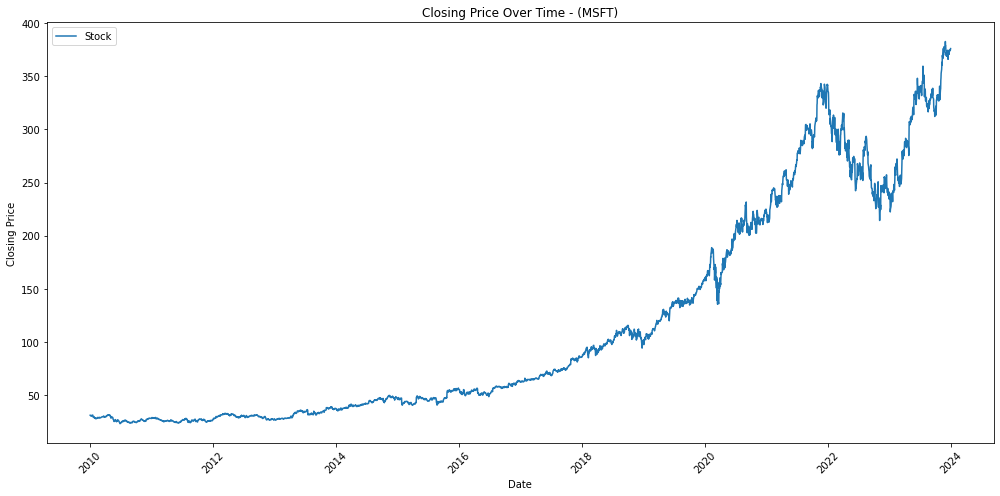

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])


# Time Series Plot for the stock's closing price
plt.figure(figsize=(14, 7))
plt.plot(df_stocks['Date'], df_stocks['Close'], label='Stock')

plt.title('Closing Price Over Time - (MSFT)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


#### Volume over the years 

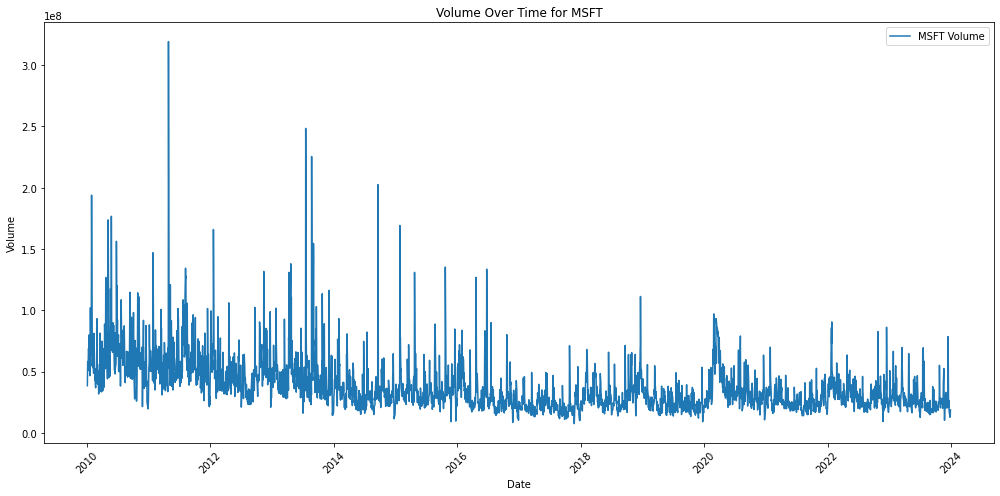

In [29]:
# Assuming df_stocks is your DataFrame and it has been properly formatted
unique_stocks = df_stocks['Stock'].unique()
n_stocks = len(unique_stocks)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_stocks, 1, figsize=(14, 7*n_stocks)) # Adjust the size as needed

for i, stock in enumerate(unique_stocks):
    subset = df_stocks[df_stocks['Stock'] == stock]
    ax = axes[i] if n_stocks > 1 else axes
    ax.plot(subset['Date'], subset['Volume'], label=f'{stock} Volume')
    ax.set_title(f'Volume Over Time for {stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

In [30]:
import pandas as pd
import numpy as np
corr = df_stocks[['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

Open, Low, Close, and Adjusted_Close prices are highly positively correlated with each other, simce because they are all measures of stock prices within the same trading day.

#### Moving Averages


##### 30-day

In [31]:
# Calculate 30-day Moving Averages for the Closing Prices of each stock
df_stocks['30_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=30).mean())

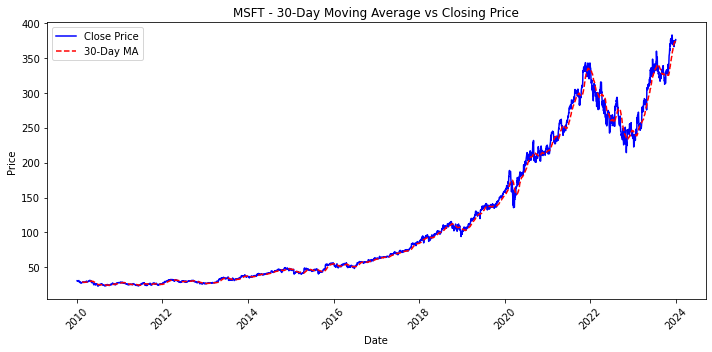

In [32]:
stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['30_day_MA'], label='30-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 30-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 60-day

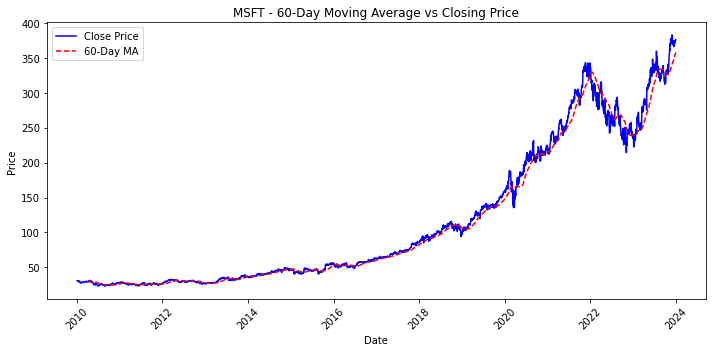

In [33]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['60_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=60).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 90-day

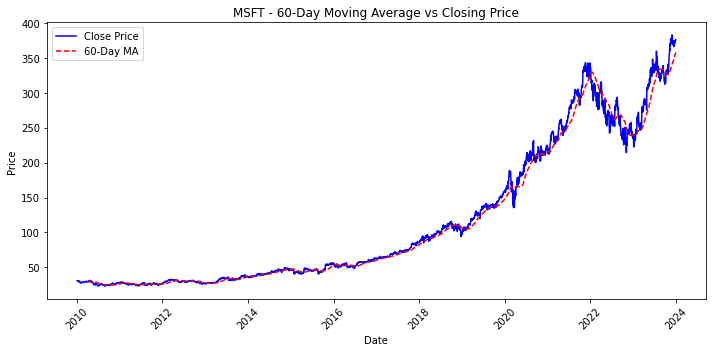

In [34]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['90_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=90).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
df_stocks.drop(['30_day_MA', '60_day_MA', '90_day_MA'], axis=1, inplace=True)


#### Seasonality Analysis

In [36]:
df_seasonality =  df_stocks

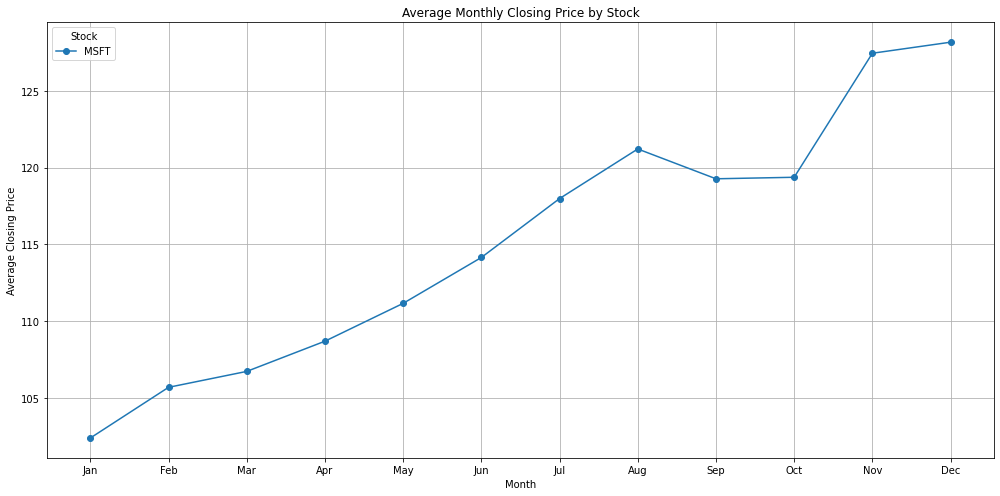

In [37]:
# Resample data to monthly and calculate average closing price for each stock
df_seasonality['Month'] = df_seasonality['Date'].dt.month
monthly_avg = df_seasonality.groupby(['Stock', 'Month'])['Close'].mean().unstack(level=0)

# Plot the monthly average closing price for each stock
monthly_avg.plot(figsize=(14, 7), marker='o')
plt.title('Average Monthly Closing Price by Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Stock')
plt.tight_layout()
plt.show()

#### Outliers

##### Box plot 

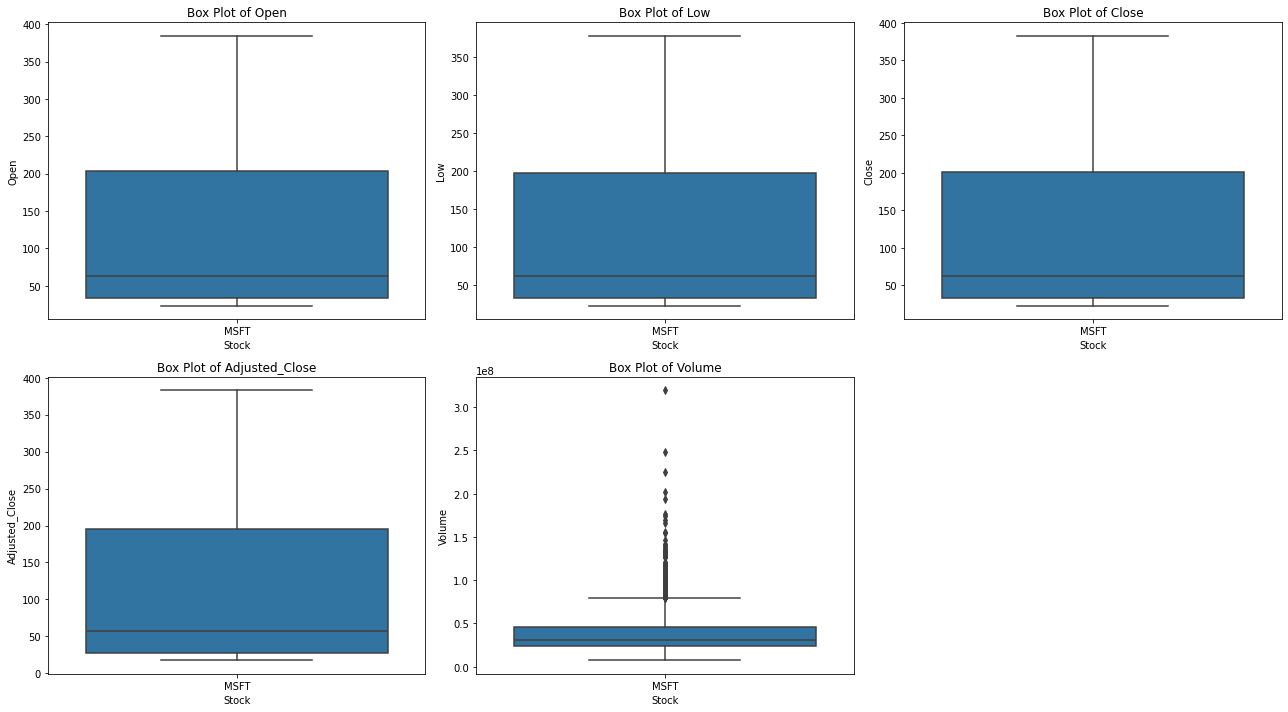

In [38]:
# Box Plots for Numerical Features to Identify Outliers

plt.figure(figsize=(18, 10))

# Creating a subplot for each numerical feature
for i, column in enumerate(['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Stock', y=column, data=df_stocks)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Stock')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


##### Volatility- Daily Price changes 

TypeError: 'Axes' object is not subscriptable

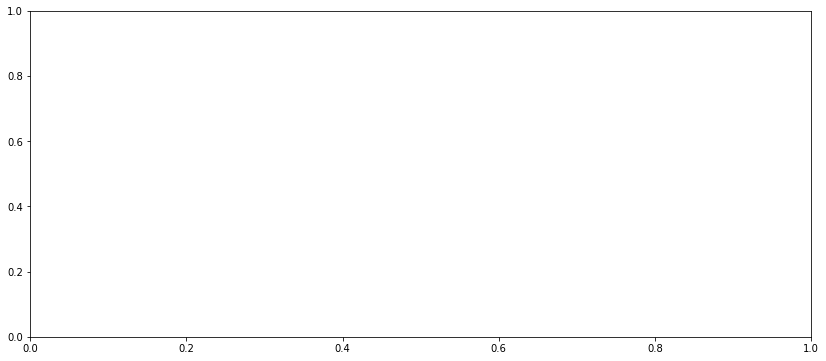

In [40]:
df_stocks_volatility = df_stocks

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2020 to the present

C:\Users\ethan\AppData\Local\Temp\ipykernel_22532\4195495870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


TypeError: 'Axes' object is not subscriptable

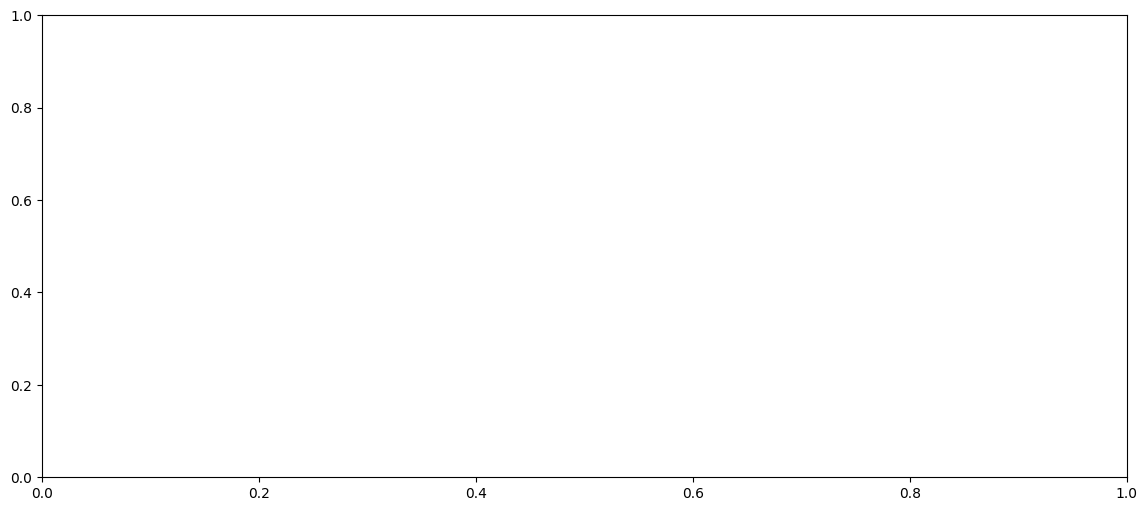

In [ ]:
# Filtering for dates from 2020 to the present
df_stocks_volatility = df_stocks_volatility[df_stocks_volatility['Date'] >= '2020-01-01']

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Volume vs. Price Movements

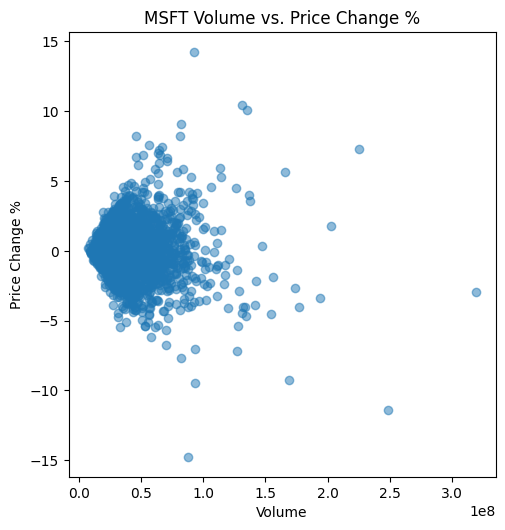

Stock
MSFT   -0.070357
dtype: float64

In [ ]:
# Calculate the day's price change percentage
df_stocks['Price_Change_Pct'] = df_stocks.groupby('Stock')['Close'].pct_change() * 100

# Scatter plot for each stock showing volume vs. price change percentage
plt.figure(figsize=(14, 10))

for i, stock in enumerate(df_stocks['Stock'].unique(), start=1):
    plt.subplot(2, 3, i)
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.scatter(subset['Volume'], subset['Price_Change_Pct'], alpha=0.5)
    plt.title(f'{stock} Volume vs. Price Change %')
    plt.xlabel('Volume')
    plt.ylabel('Price Change %')

plt.tight_layout()
plt.show()

# Pearson correlation coefficient between volume and price change percentage for each stock
correlation_df = df_stocks.groupby('Stock').apply(lambda x: x[['Volume', 'Price_Change_Pct']].corr().iloc[0, 1])

correlation_df


In [ ]:
#df_stocks.to_csv('data/stocks/df_stocks.csv')